In [70]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
sns.set()

In [71]:
fandango = pd.read_csv('fandango_scrape.csv')
fandango.head()

,FILM,STARS,RATING,VOTES
0,Fifty Shades of Grey (2015),4.0,3.9,34846
1,Jurassic World (2015),4.5,4.5,34390
2,American Sniper (2015),5.0,4.8,34085
3,Furious 7 (2015),5.0,4.8,33538
4,Inside Out (2015),4.5,4.5,15749


In [72]:
fandango.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   FILM    504 non-null    object 
 1   STARS   504 non-null    float64
 2   RATING  504 non-null    float64
 3   VOTES   504 non-null    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 15.9+ KB


In [73]:
fandango.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
STARS,504.0,3.558532,1.563133,0.0,3.5,4.0,4.50,5.0
RATING,504.0,3.375794,1.491223,0.0,3.1,3.8,4.30,5.0
VOTES,504.0,1147.863095,3830.583136,0.0,3.0,18.5,189.75,34846.0


In [74]:
fandango.corr()

,STARS,RATING,VOTES
STARS,1.000000,0.994696,0.164218
RATING,0.994696,1.000000,0.163764
VOTES,0.164218,0.163764,1.000000


In [75]:
fandango['YEAR'] = fandango['FILM'].str.split('(').str[-1].str.replace(')','')

C:\Users\Adenle\AppData\Local\Temp\ipykernel_10752\1097210958.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fandango['YEAR'] = fandango['FILM'].str.split('(').str[-1].str.replace(')','')


In [76]:
fandango

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
499,Valiyavan (2015),0.0,0.0,0,2015
500,WWE SummerSlam 2015 (2015),0.0,0.0,0,2015
501,Yagavarayinum Naa Kaakka (2015),0.0,0.0,0,2015
502,"Yesterday, Today and Tomorrow (1964)",0.0,0.0,0,1964


In [77]:
#count the numbers of year of each movies
fandango['YEAR'].value_counts()

2015    478
2014     23
2016      1
1964      1
2012      1
Name: YEAR, dtype: int64

<AxesSubplot: xlabel='YEAR', ylabel='count'>

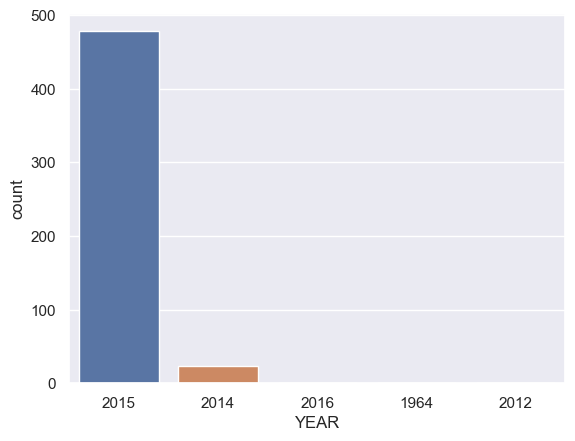

In [78]:
#visusalise the year movie per year plot

sns.countplot(x='YEAR',data=fandango)

In [79]:
fandango.isnull().sum()

FILM      0
STARS     0
RATING    0
VOTES     0
YEAR      0
dtype: int64

relationship between votes and rating

In [80]:
fandango.head()

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015


<AxesSubplot: xlabel='STARS', ylabel='RATING'>

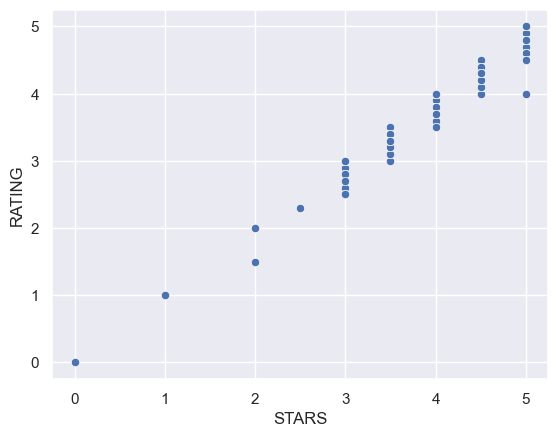

In [81]:
sns.scatterplot(x='STARS',y='RATING',data=fandango)

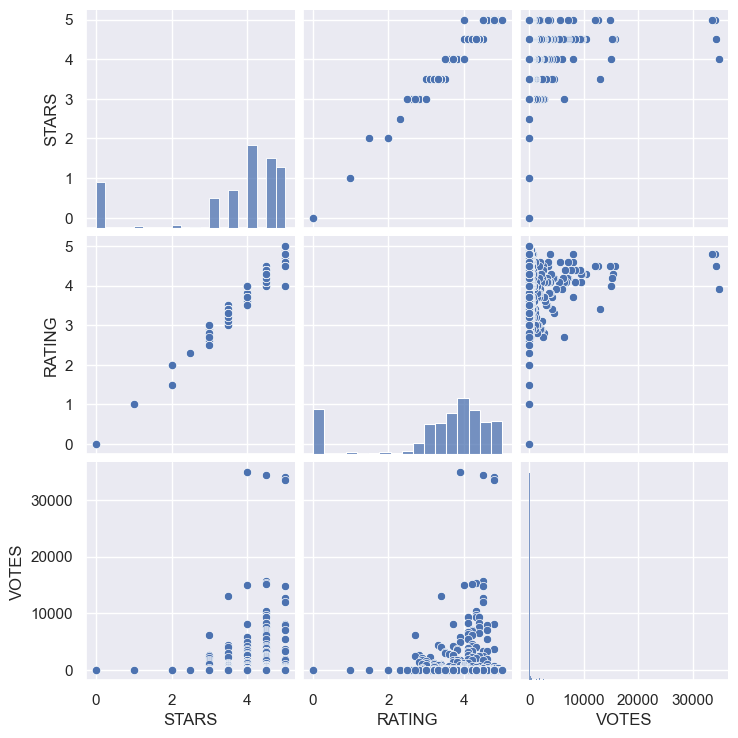

In [82]:
sns.pairplot(fandango)

In [83]:
#Top 10 highest votes
fandango.nlargest(10,'VOTES')

,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
5,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,2014
6,Kingsman: The Secret Service (2015),4.5,4.2,15205,2015
7,Minions (2015),4.0,4.0,14998,2015
8,Avengers: Age of Ultron (2015),5.0,4.5,14846,2015
9,Into the Woods (2014),3.5,3.4,13055,2014


In [84]:
#Top 10  highest rating
fandango.nlargest(10,'RATING')

,FILM,STARS,RATING,VOTES,YEAR
296,National Theatre Live: Man and Superman (2015),5.0,5.0,10,2015
304,Maze Runner: The Scorch Trials (2015),5.0,5.0,9,2015
317,Cheatin' (2015),5.0,5.0,8,2015
323,League of Legends LCS Summer Finals (2015),5.0,5.0,7,2015
329,Hotel Transylvania 2 (2015),5.0,5.0,6,2015
330,Soaked In Bleach (2015),5.0,5.0,6,2015
365,National Theatre Live: The Hard Problem (2015),5.0,5.0,4,2015
366,The Boy (2015),5.0,5.0,4,2015
367,The Perfect Guy (2015),5.0,5.0,4,2015
380,Fall to Rise (2015),5.0,5.0,3,2015


In [85]:
reviewed_films = fandango[fandango['VOTES'] > 0]
reviewed_films



,FILM,STARS,RATING,VOTES,YEAR
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015
1,Jurassic World (2015),4.5,4.5,34390,2015
2,American Sniper (2015),5.0,4.8,34085,2015
3,Furious 7 (2015),5.0,4.8,33538,2015
4,Inside Out (2015),4.5,4.5,15749,2015
...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015
431,The Intern (2015),5.0,5.0,1,2015
432,The Park Bench (2015),5.0,5.0,1,2015
433,The Wanted 18 (2015),5.0,5.0,1,2015


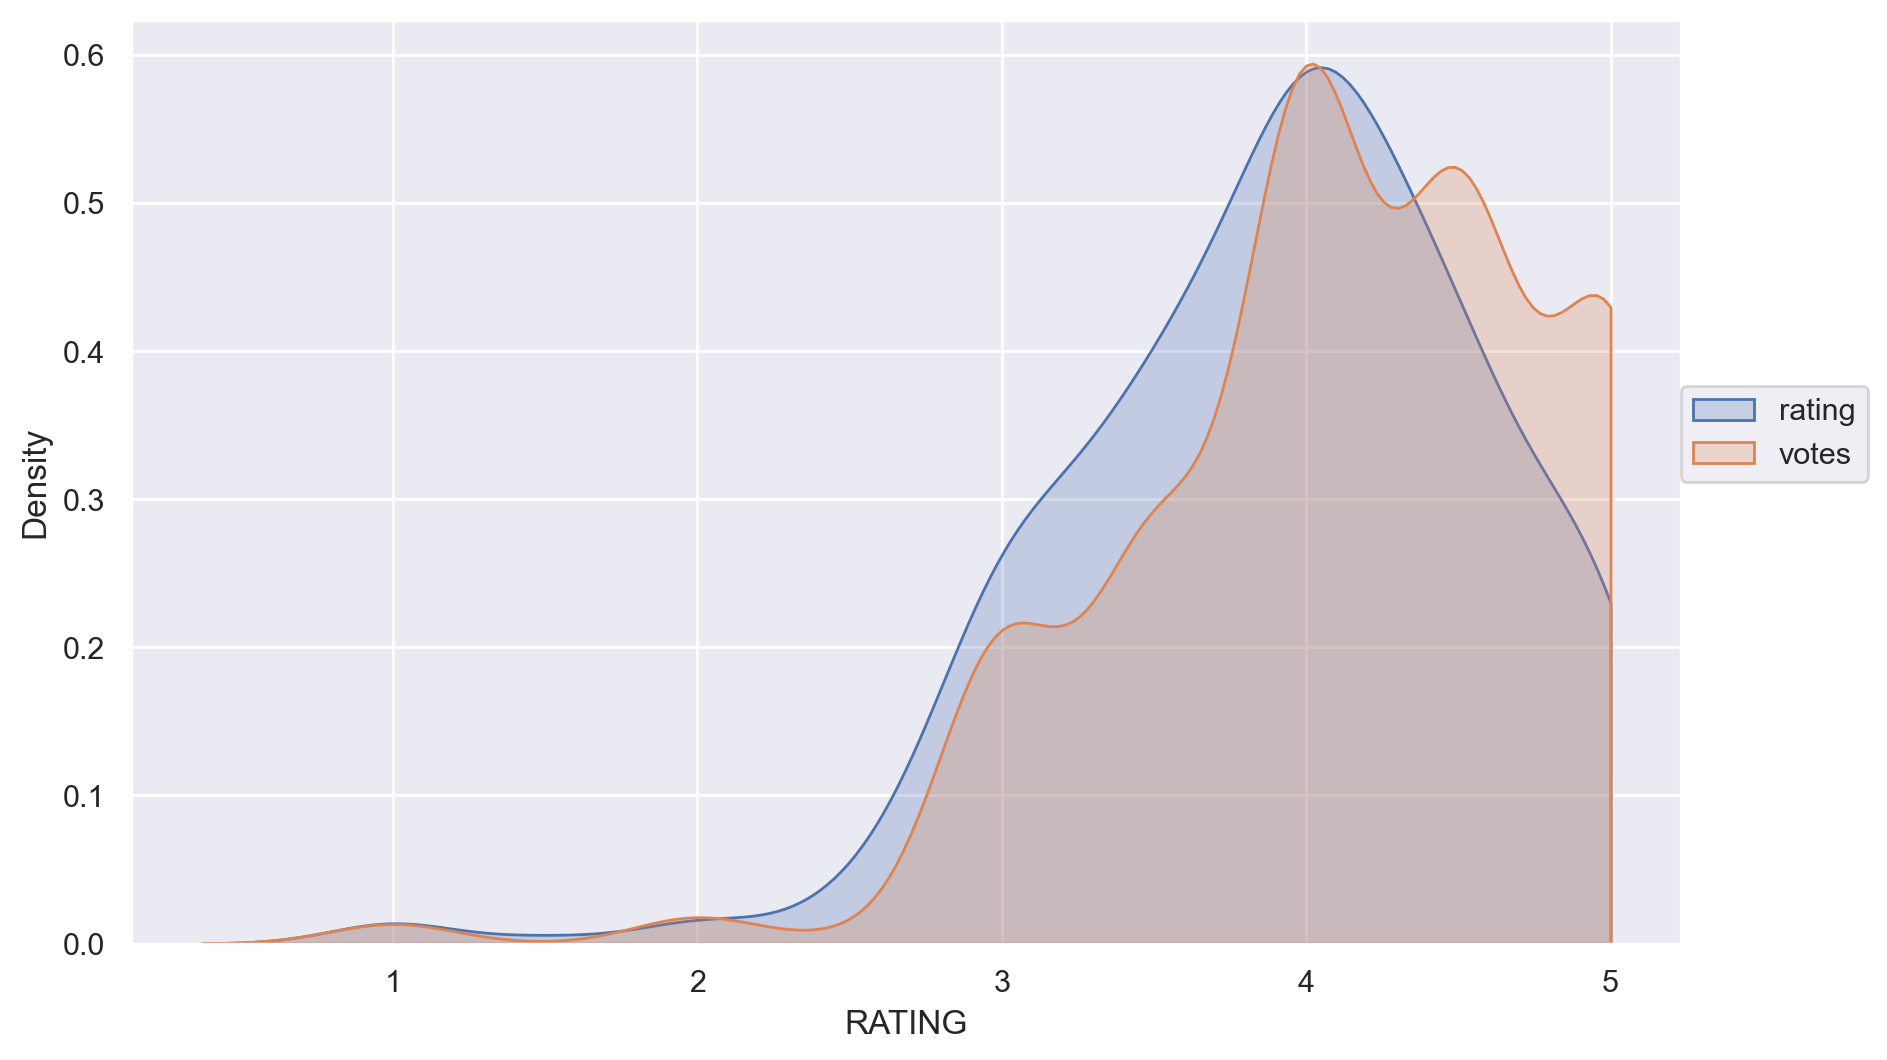

In [86]:
plt.figure(figsize=(10,6),dpi=200)
sns.kdeplot(data=reviewed_films,x='RATING',label='rating',clip=[0,5],fill=True)
sns.kdeplot(data=reviewed_films,x='STARS',label='votes',clip=[0,5],fill=True)
plt.legend(loc=(1,0.5))

<AxesSubplot: xlabel='RATING', ylabel='VOTES'>

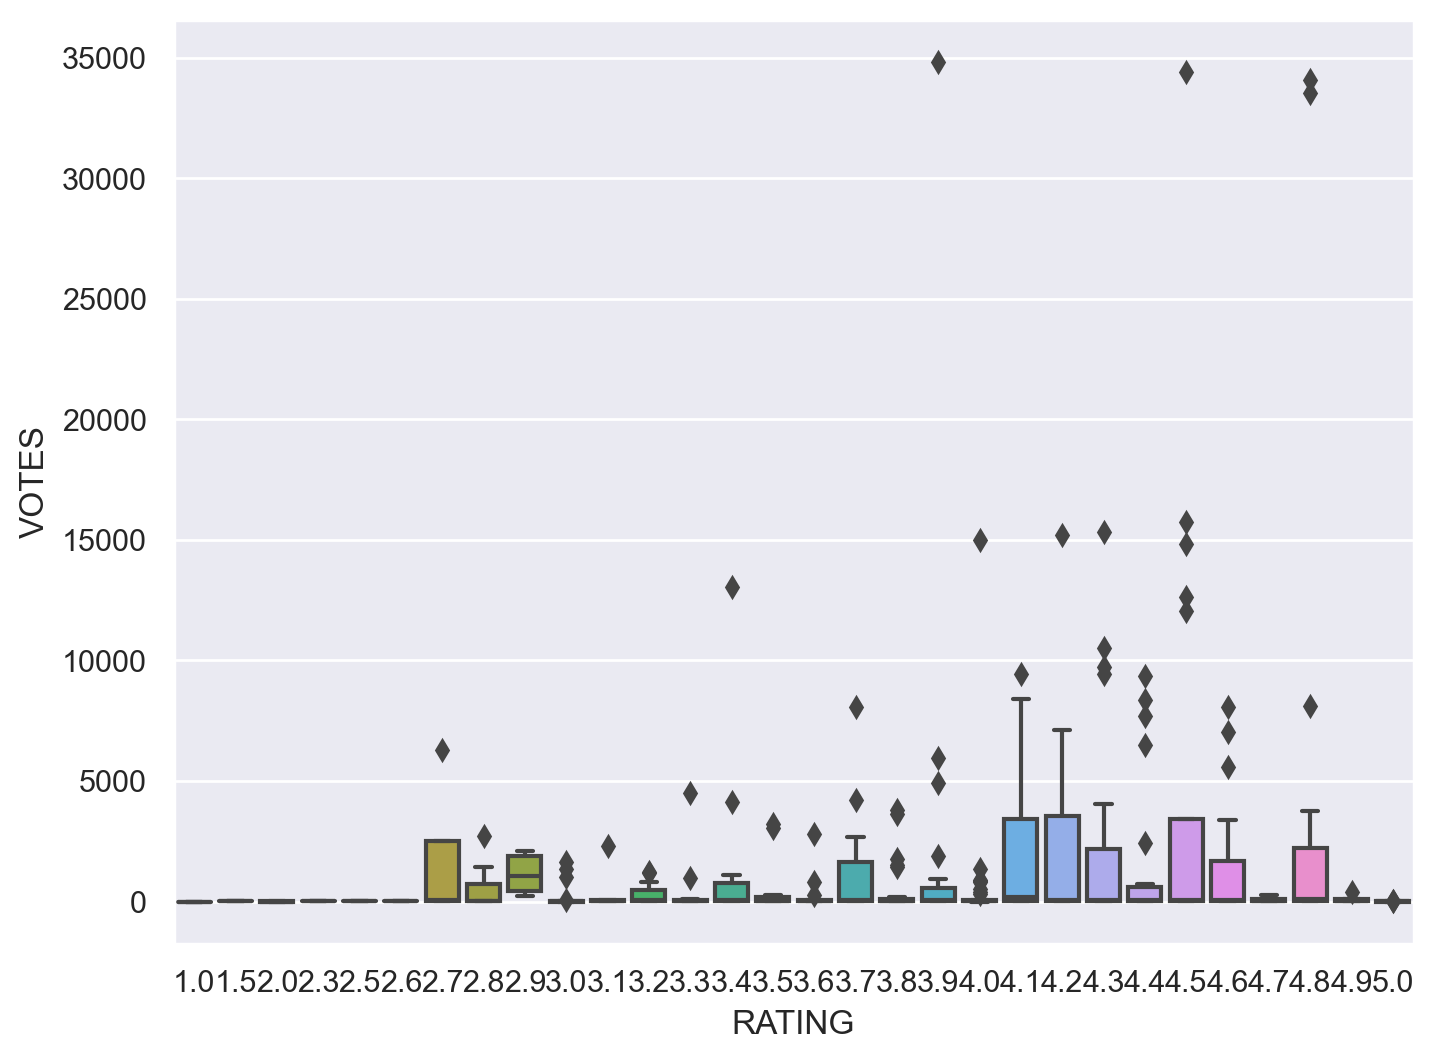

In [119]:
plt.figure(figsize=(8,6),dpi=200)
sns.boxplot(y='VOTES',x='RATING',data=reviewed_films)

In [88]:
reviewed_films['DIFF'] = reviewed_films['STARS'] - reviewed_films['RATING']
reviewed_films['DIFF'] = np.round(reviewed_films['DIFF'],2)

C:\Users\Adenle\AppData\Local\Temp\ipykernel_10752\3871909134.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_films['DIFF'] = reviewed_films['STARS'] - reviewed_films['RATING']
C:\Users\Adenle\AppData\Local\Temp\ipykernel_10752\3871909134.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewed_films['DIFF'] = np.round(reviewed_films['DIFF'],2)


In [89]:
reviewed_films

,FILM,STARS,RATING,VOTES,YEAR,DIFF
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,0.1
1,Jurassic World (2015),4.5,4.5,34390,2015,0.0
2,American Sniper (2015),5.0,4.8,34085,2015,0.2
3,Furious 7 (2015),5.0,4.8,33538,2015,0.2
4,Inside Out (2015),4.5,4.5,15749,2015,0.0
...,...,...,...,...,...,...
430,That Sugar Film (2015),5.0,5.0,1,2015,0.0
431,The Intern (2015),5.0,5.0,1,2015,0.0
432,The Park Bench (2015),5.0,5.0,1,2015,0.0
433,The Wanted 18 (2015),5.0,5.0,1,2015,0.0


<AxesSubplot: xlabel='DIFF', ylabel='Density'>

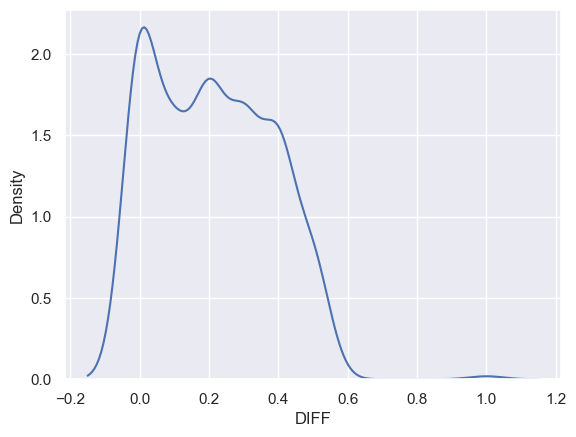

In [90]:
sns.kdeplot(data=reviewed_films,x='DIFF')

In [91]:
reviewed_films['DIFF'].value_counts()

0.0    107
0.2     82
0.3     72
0.4     70
0.1     66
0.5     37
1.0      1
Name: DIFF, dtype: int64

<AxesSubplot: xlabel='DIFF', ylabel='count'>

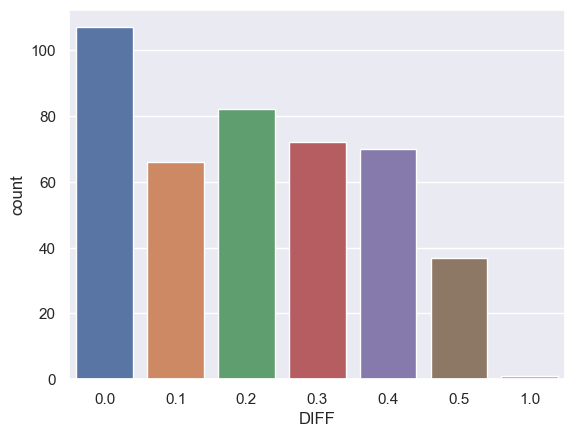

In [92]:
sns.countplot(data=reviewed_films,x='DIFF')

<AxesSubplot: >

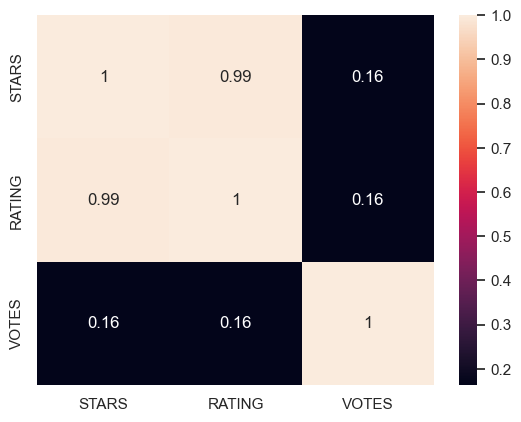

In [93]:
sns.heatmap(fandango.corr(),annot=True)

In [94]:
all_sites = pd.read_csv('all_sites_scores.csv')
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,1330,271107
1,Cinderella (2015),85,80,67,7.5,7.1,249,65709
2,Ant-Man (2015),80,90,64,8.1,7.8,627,103660
3,Do You Believe? (2015),18,84,22,4.7,5.4,31,3136
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,88,19560


In [95]:
all_sites.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FILM                        146 non-null    object 
 1   RottenTomatoes              146 non-null    int64  
 2   RottenTomatoes_User         146 non-null    int64  
 3   Metacritic                  146 non-null    int64  
 4   Metacritic_User             146 non-null    float64
 5   IMDB                        146 non-null    float64
 6   Metacritic_user_vote_count  146 non-null    int64  
 7   IMDB_user_vote_count        146 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 9.2+ KB


In [96]:
all_sites.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
RottenTomatoes,146.0,60.849315,30.168799,5.0,31.25,63.50,89.00,100.0
RottenTomatoes_User,146.0,63.876712,20.024430,20.0,50.00,66.50,81.00,94.0
Metacritic,146.0,58.808219,19.517389,13.0,43.50,59.00,75.00,94.0
Metacritic_User,146.0,6.519178,1.510712,2.4,5.70,6.85,7.50,9.6
IMDB,146.0,6.736986,0.958736,4.0,6.30,6.90,7.40,8.6
Metacritic_user_vote_count,146.0,185.705479,316.606515,4.0,33.25,72.50,168.50,2375.0
IMDB_user_vote_count,146.0,42846.205479,67406.509171,243.0,5627.00,19103.00,45185.75,334164.0


<AxesSubplot: xlabel='RottenTomatoes', ylabel='RottenTomatoes_User'>

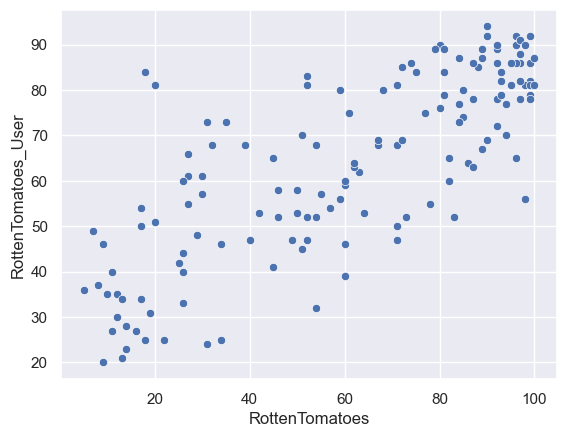

In [97]:
sns.scatterplot(x='RottenTomatoes',y='RottenTomatoes_User',data=all_sites)

In [98]:
all_sites['DIFF'] = all_sites['RottenTomatoes'] = all_sites['RottenTomatoes_User']

In [99]:
all_sites['DIFF'] = all_sites['DIFF'].apply(abs)
all_sites['DIFF']

0      86
1      80
2      90
3      84
4      28
       ..
141    78
142    82
143    78
144    81
145    63
Name: DIFF, Length: 146, dtype: int64

In [100]:
all_sites['DIFF'].mean()

63.87671232876713

<AxesSubplot: xlabel='DIFF', ylabel='Count'>

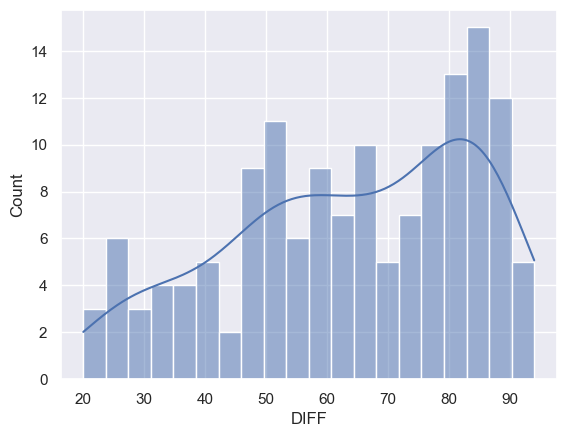

In [101]:
sns.histplot(data=all_sites,x='DIFF',fill=True,kde=True,bins=20)

In [102]:
def all_sites_year(year):
    year = year.split('(')[-1]
    year = year.replace(')','')
    return year
                  

In [103]:
all_sites['movie_year'] = all_sites['FILM'].apply(all_sites_year)

In [104]:
all_sites['movie_year'].head()

0    2015
1    2015
2    2015
3    2015
4    2015
Name: movie_year, dtype: object

In [105]:
all_sites['movie_year']= pd.to_datetime(all_sites['movie_year'])

In [106]:
all_sites['movie_year'].value_counts()

2015-01-01    129
2014-01-01     17
Name: movie_year, dtype: int64

<AxesSubplot: xlabel='movie_year', ylabel='IMDB'>

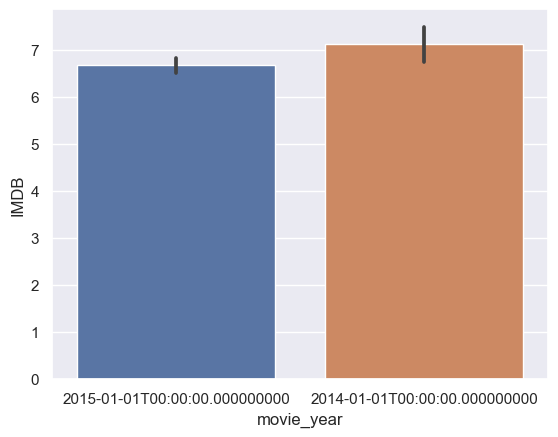

In [107]:
sns.barplot(x='movie_year',y='IMDB',data=all_sites)

In [108]:
all_sites['DIFF'] = all_sites['RottenTomatoes'] - all_sites['RottenTomatoes_User']

In [109]:
all_sites.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF,movie_year
0,Avengers: Age of Ultron (2015),86,86,66,7.1,7.8,1330,271107,0,2015-01-01
1,Cinderella (2015),80,80,67,7.5,7.1,249,65709,0,2015-01-01
2,Ant-Man (2015),90,90,64,8.1,7.8,627,103660,0,2015-01-01
3,Do You Believe? (2015),84,84,22,4.7,5.4,31,3136,0,2015-01-01
4,Hot Tub Time Machine 2 (2015),28,28,29,3.4,5.1,88,19560,0,2015-01-01


In [112]:
all_movies = pd.merge(fandango,all_sites,on='FILM',how='inner')
all_movies.head()

,FILM,STARS,RATING,VOTES,YEAR,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Metacritic_user_vote_count,IMDB_user_vote_count,DIFF,movie_year
0,Fifty Shades of Grey (2015),4.0,3.9,34846,2015,42,42,46,3.2,4.2,778,179506,0,2015-01-01
1,Jurassic World (2015),4.5,4.5,34390,2015,81,81,59,7.0,7.3,1281,241807,0,2015-01-01
2,American Sniper (2015),5.0,4.8,34085,2015,85,85,72,6.6,7.4,850,251856,0,2015-01-01
3,Furious 7 (2015),5.0,4.8,33538,2015,84,84,67,6.8,7.4,764,207211,0,2015-01-01
4,Inside Out (2015),4.5,4.5,15749,2015,90,90,94,8.9,8.6,807,96252,0,2015-01-01


<AxesSubplot: >

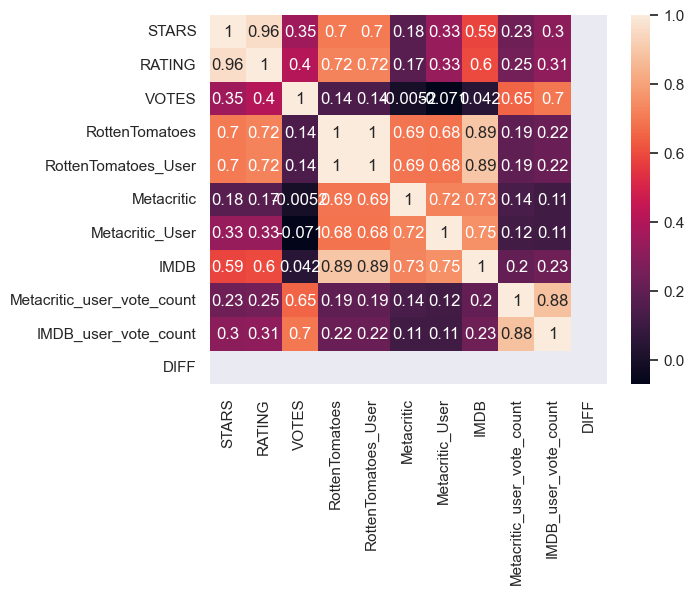

In [117]:
sns.heatmap(all_movies.corr(),annot=True)

In [ ]:
T